In [62]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [63]:
df14_15 = pd.read_csv('GDAX.BTC-USD_140101_150101.csv', sep=',')

In [64]:
df = df14_15
l = len(df)
print(l)

27


In [65]:
df15_16 = pd.read_csv('GDAX.BTC-USD_150101_160101.csv', sep=',')
rename_dic = dict(zip(df15_16.index, 
                     [i + l for i in range(len(df15_16))]))
df15_16.rename(index=rename_dic, inplace=True)

In [66]:
df = df.append(df15_16)
l = len(df)
print(l)

441646


In [67]:
df16_17 = pd.read_csv('GDAX.BTC-USD_160101_170101.csv', sep=',')

rename_dic = dict(zip(df16_17.index, 
                     [i + l for i in range(len(df16_17))]))
df16_17.rename(index=rename_dic, inplace=True)

In [68]:
df = df.append(df16_17)
l = len(df)
print(l)

944616


In [69]:
df17_18 = pd.read_csv('GDAX.BTC-USD_170101_180101.csv', sep=',')

rename_dic = dict(zip(df17_18.index, 
                     [i + l for i in range(len(df17_18))]))
df17_18.rename(index=rename_dic, inplace=True)

In [70]:
df = df.append(df17_18)
l = len(df)
print(l)

1426728


In [71]:
df18_19 = pd.read_csv('GDAX.BTC-USD_180101_190101.csv', sep=',')
rename_dic = dict(zip(df18_19.index, 
                     [i + l for i in range(len(df18_19))]))
df18_19.rename(index=rename_dic, inplace=True)

In [72]:
df = df.append(df18_19)
l = len(df)
print(l)

1951822


In [73]:
rename_dic = dict(zip(df.columns, 
                      ['ticks', 'per', 'date', 'time',
                       'open', 'high', 'low', 'close',
                       'vol']))
df.rename(columns=rename_dic, inplace=True)
df.columns

Index(['ticks', 'per', 'date', 'time', 'open', 'high', 'low', 'close', 'vol'], dtype='object')

In [103]:
usd = 20
bitcoin = 0

In [166]:
k = np.array([120000, 130000])

In [167]:
y = [df.open[0]]*len(k)
for index, i in enumerate(k):
    df.open[int(100000-i):100000]

In [168]:
results = [[usd, bitcoin] for i in range(len(k))]
all_j = [[20 for j in range(len(df.open))] for i in range(len(k))]
all_ = [20 for j in range(len(df.open))]
result = [[usd, bitcoin] for i in range(len(df.open))]

In [169]:
for j in range(100001, len(df.open)):
    max_index = 0
    for i in range(len(k)):
        y[i] = (y[i]*k[i] - df.open[j-k[i] if j > k[i] else 0] + df.open[j])/k[i]
        dif = df.open[j] - y[i]
        
        a = results[i][0]+results[i][1]*df.open[j]
        k1 = 1 if dif > 0 else 0
        if k1 == 0 and results[i][0] == 0:
            a *= 0.999
            results[i][0] = a*(1-k1)
            results[i][1] = 0
        elif k1 == 1 and results[i][1] == 0:
            a *= 0.999
            results[i][1] = a*k1/df.open[j]
            results[i][0] = 0
        
        all_j[i][j] =a
        if ((all_j[max_index][j] - all_j[max_index][j-1])/all_j[max_index][j-1] < (all_j[i][j] - all_j[i][j-1])/all_j[i][j-1]):
            max_index = i
        
    y[max_index] = (y[max_index]*k[max_index] - df.open[j-k[max_index] if j > k[max_index] else 0] + df.open[j])/k[max_index]
    dif = df.open[j] - y[max_index]
    
    a = result[j-1][0]+result[j-1][1]*df.open[j]
    
    k1 = 1 if dif > 0 else 0
    if k1 == 0 and result[0] == 0:
        a *= 0.999
        result[j][0] = a*(1-k1)
        result[j][1] = 0
    elif k1 == 1 and result[1] == 0:
        a *= 0.999
        result[j][1] = a*k1/df.open[j]
        result[j][0] = 0
    
    all_[j] = a
    if j%10000 == 0:
        print("{} - {}".format(j//10000, all_[j]))

11 - 20.0
12 - 20.0
13 - 20.0
14 - 20.0
15 - 20.0
16 - 20.0
17 - 20.0
18 - 20.0
19 - 20.0
20 - 20.0
21 - 20.0
22 - 20.0
23 - 20.0
24 - 20.0
25 - 20.0
26 - 20.0
27 - 20.0
28 - 20.0
29 - 20.0
30 - 20.0
31 - 20.0
32 - 20.0
33 - 20.0
34 - 20.0
35 - 20.0
36 - 20.0
37 - 20.0
38 - 20.0
39 - 20.0
40 - 20.0
41 - 20.0
42 - 20.0
43 - 20.0
44 - 20.0
45 - 20.0
46 - 20.0
47 - 20.0
48 - 20.0
49 - 20.0
50 - 20.0
51 - 20.0
52 - 20.0
53 - 20.0
54 - 20.0
55 - 20.0
56 - 20.0
57 - 20.0
58 - 20.0
59 - 20.0
60 - 20.0
61 - 20.0
62 - 20.0
63 - 20.0
64 - 20.0
65 - 20.0
66 - 20.0
67 - 20.0
68 - 20.0
69 - 20.0
70 - 20.0
71 - 20.0
72 - 20.0
73 - 20.0
74 - 20.0
75 - 20.0
76 - 20.0
77 - 20.0
78 - 20.0
79 - 20.0
80 - 20.0
81 - 20.0
82 - 20.0
83 - 20.0
84 - 20.0
85 - 20.0
86 - 20.0
87 - 20.0
88 - 20.0
89 - 20.0
90 - 20.0
91 - 20.0
92 - 20.0
93 - 20.0
94 - 20.0
95 - 20.0
96 - 20.0
97 - 20.0
98 - 20.0
99 - 20.0
100 - 20.0
101 - 20.0
102 - 20.0
103 - 20.0
104 - 20.0
105 - 20.0
106 - 20.0
107 - 20.0
108 - 20.0
109 - 20.0


In [170]:
c = ['orange', 'yellow', 'black', 'blue', 'green', 'gray', 'red', 'violet', 'tan', 'lime', 'darkblue', 'pink', 'aqua', 'gold', 'darkred']

In [171]:
all_3 = all_j

In [172]:
all_3_bitcoin = [None]*len(k)

In [87]:
k[[4,8,9]]

array([  64, 1024, 2048])

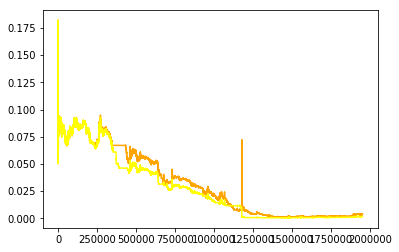

In [173]:
for i in range(len(k)):
    all_3_bitcoin = all_3[i]/df.open
    plt.plot(list(range(len(all_3[i]))), all_3_bitcoin, color = c[i])

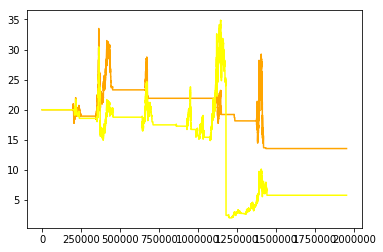

In [174]:
for i in range(len(k)):
    plt.plot(list(range(len(all_3[i]))), all_3[i], color = c[i])

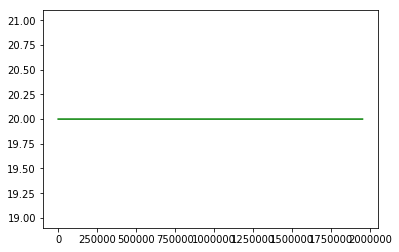

In [113]:
plt.plot(list(range(len(all_))), all_, color = "green")

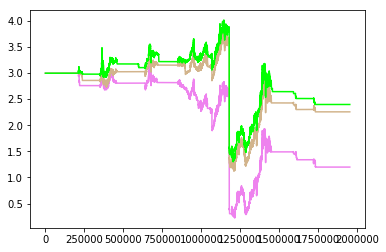

In [121]:
for i in range(len(k))[-3:]:
    all_3_log = list(map(lambda a : math.log(a), all_3[i]))
    plt.plot(list(range(len(all_3[i]))), all_3_log, color = c[i])

In [ ]:
all_3[-1]

In [92]:
all_3[0][-1]

1.4279580721165404e-30

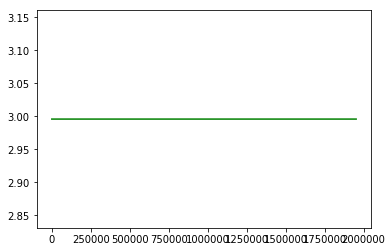

In [93]:
plt.plot(list(range(len(all_))), list(map(lambda a : math.log(a), all_)), color = "green")

In [51]:
result

[[1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [10

In [30]:
list(map(lambda a : a[-1], all_3))

[1000.0,
 905.0488453103892,
 847.8211126175098,
 668.6144428230434,
 594.4626926081095,
 547.325609754808,
 751.5814340416911,
 703.7723792993272,
 824.2406418927709,
 1057.1986885434997,
 1622.7129806776434,
 2527.429952457118,
 4900.742261407813,
 7249.149628182869,
 5063.072965987659]

In [52]:
d = list(map(lambda a : 1 if a[1] == 0 else 0, result))

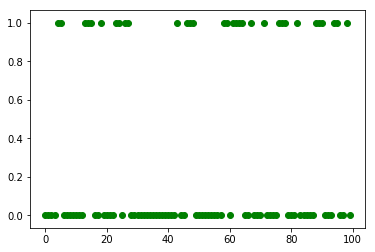

In [57]:
plt.scatter(list(range(len(all_[-100:]))), d[-100:], color = "green")

In [59]:
all_[-10:]

[1.8147881071587026e+28,
 1.8147881071587026e+28,
 1.815085797412116e+28,
 1.815085797412116e+28,
 1.8150760370759384e+28,
 1.8150760370759384e+28,
 1.8150760370759384e+28,
 1.8163148669892725e+28,
 1.8159100524900332e+28,
 1.8159100524900332e+28]

In [60]:
df.open[-10:]

1951812    3718.50
1951813    3718.70
1951814    3719.31
1951815    3719.31
1951816    3719.29
1951817    3718.94
1951818    3721.49
1951819    3724.03
1951820    3723.20
1951821    3724.04
Name: open, dtype: float64

In [61]:
result[-10:]

[[1.8147881071587026e+28, 0.0],
 [0.0, 4.880168088737201e+24],
 [0.0, 4.880168088737201e+24],
 [0.0, 4.880168088737201e+24],
 [1.8150760370759384e+28, 0.0],
 [1.8150760370759384e+28, 0.0],
 [0.0, 4.877283123361714e+24],
 [0.0, 4.877283123361714e+24],
 [1.8159100524900332e+28, 0.0],
 [0.0, 4.876182996127951e+24]]

In [26]:
d = list(map(lambda i : (all_[i] - all_[i-24*30*60])*100/all_[i-24*30*60], range(24*30*60, len(all_))))

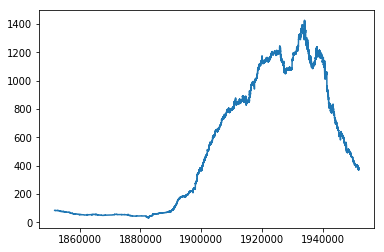

In [28]:
plt.plot(list(range(24*30*60, len(all_)))[-100000:], d[-100000:])

In [118]:
(1.001)**(60*24*365)

1.4161952384168186e+228

In [156]:
df.open[1178444], df.open[1178445], df.open[1178446], df.open[1178447]

(2623.07, 2623.09, 265.88, 2564.95)